In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CleanedBelloFashions.csv')
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,0,1,2,3,4,5,6,ProductType_lbl,Price_5000
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
3,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
4,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,0.0


### Most Popular Product Type

In [12]:
df.groupby('ProductType').ProductType.value_counts().sort_values(ascending=False).head(1)

ProductType    ProductType  
Coats/Jackets  Coats/Jackets    25
Name: ProductType, dtype: int64

In [13]:
df.ProductType.value_counts().sort_values(ascending=False).head(1)

Coats/Jackets    25
Name: ProductType, dtype: int64

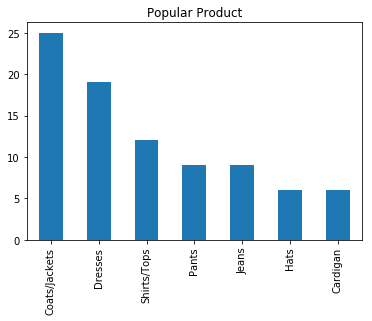

In [17]:
df.ProductType.value_counts().plot(kind='bar', title='Popular Product')

#### Most Preferred Payment Mode

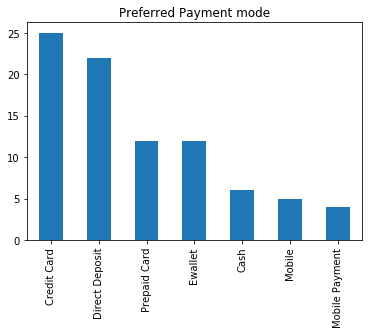

In [18]:
df.PaymentMode.value_counts().plot(kind='bar', title='Preferred Payment mode')

#### Most Preferred Shipping Mode

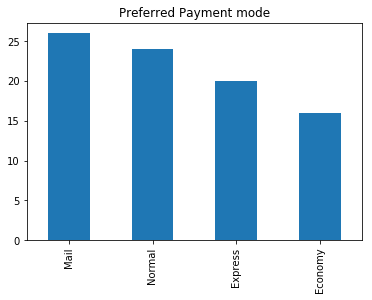

In [19]:
df.ShippingMode.value_counts().plot(kind='bar', title='Preferred Payment mode')

##### Average Price/ShippingTime of products per category

In [22]:
df.groupby('ProductType')[['Price','ShippingTime']].agg([np.mean])

,Price,ShippingTime
,mean,mean
ProductType,,
Cardigan,4399.542191,11.333333
Coats/Jackets,5399.696403,12.360000
Dresses,5741.020387,13.473684
Hats,5053.091574,13.000000
Jeans,4547.485495,11.888889
Pants,6436.776080,13.666667
Shirts/Tops,5186.437038,12.500000


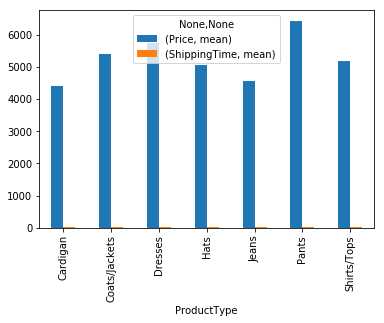

In [23]:
df.groupby('ProductType')[['Price','ShippingTime']].agg([np.mean]).plot(kind='bar')

##### Check the distribution of Shipping time

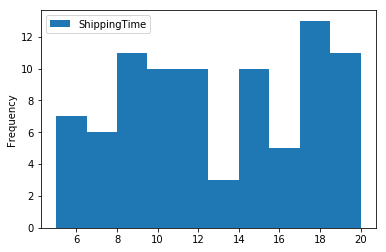

In [24]:
df[['ShippingTime']].plot.hist()

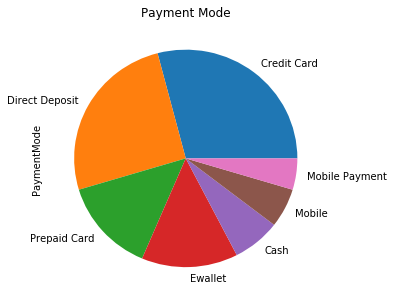

In [29]:
plt.figure(figsize=(5,5))
df['PaymentMode'].value_counts().plot.pie(title='Payment Mode')

In [27]:
df['PaymentMode'].value_counts()

Credit Card       25
Direct Deposit    22
Prepaid Card      12
Ewallet           12
Cash               6
Mobile             5
Mobile Payment     4
Name: PaymentMode, dtype: int64

In [45]:
styled_data = df.style

def price_range(prices):
    out = []
    for price in prices:
        if float(price) > 5000:
            out.append("background-color : green")
        else:
            out.append("background-color : #eccbd9")
    return out
styled_data.apply(price_range, subset=['Price'])

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,0,1,2,3,4,5,6,ProductType_lbl,Price_5000
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.22,₹,0,1,0,0,0,0,0,1,1
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.43,€,0,0,1,0,0,0,0,2,0
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.05,₹,0,1,0,0,0,0,0,1,1
3,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.27,£,0,1,0,0,0,0,0,1,1
4,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.06,$,0,0,0,0,1,0,0,4,0
5,2020-08-21,10481,Dresses,2 star,7750,Female,Direct Deposit,Economy,17,4532.26,€,0,0,1,0,0,0,0,2,0
6,2020-08-18,10482,Pants,5 star,7816,Female,Mobile Payment,Mail,10,8054.78,€,0,0,0,0,0,1,0,5,1
7,2020-08-11,10483,Cardigan,4 star,7021,Unspecified,Cash,Express,6,6756.94,$,1,0,0,0,0,0,0,0,1
8,2020-08-02,10484,Coats/Jackets,1 star,5024,Male,Mobile Payment,Express,18,3148.65,$,0,1,0,0,0,0,0,1,0
9,2020-08-20,10485,Dresses,1 star,9030,Female,Mobile,Mail,7,9743.11,$,0,0,1,0,0,0,0,2,1
